# Data Augmentation, Image Augmentation

It's a preprocessing to make the the model avoid overfitting.

By using augmentation it can make the image 'rotate' , ' change height, width', 'zoom', 'horizontal, vertical flip' etc etc

----------------------------------------------------------------

Image Augmentation is a very simple, but very powerful tool to help you avoid overfitting your data. The concept is very simple though: If you have limited data, then the chances of you having data to match potential future predictions is also limited, and logically, the less data you have, the less chance you have of getting accurate predictions for data that your model hasn't yet seen. To put it simply, if you are training a model to spot cats, and your model has never seen what a cat looks like when lying down, it might not recognize that in future.

Augmentation simply amends your images on-the-fly while training using transforms like rotation. So, it could 'simulate' an image of a cat lying down by rotating a 'standing' cat by 90 degrees. As such you get a cheap way of extending your dataset beyond what you have already. 

To learn more about Augmentation, and the available transforms, check out https://github.com/keras-team/keras-preprocessing -- and note that it's referred to as preprocessing for a very powerful reason: that it doesn't require you to edit your raw images, nor does it amend them for you on-disk. It does it in-memory as it's performing the training, allowing you to experiment without impacting your dataset. 



In [3]:
# train_datagen = ImageDataGenerator(
#             rescale = 1./255,
#             rotation_range = 40,
#             width_shift_range = 0.2,
#             height_shift_range = 0.2,
#             shear_range = 0.2,
#             zoom_range = 0.2,
#             horizontal_flip = True,
#             fill_mode ='nearest')

# (preprocessing) Using ImageDataGenerator 

- rescale -> normalizing the data
- rotation_range -> rotating the image 0~40 degree
- width_shift_range, height_shift_range -> manipulating height and width of the image for 20% 
- shear_range -> making the subject look similar with other subject. (making subject's pose similar to other image) 
- zoom_range -> making the image zommed that we can spot more generalized examples
- horizontal_flip -> fliping the image horizontally (mirroring) 
- fill_mode -> filling the pixel that is lost by the operations. (make the emptied pixel filled with nearest pixel) 


##### Before doing Image/Data Augmentation


In [10]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr=1e-4),
             metrics = ['accuracy'])

# All image will be resclaed by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
    )

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
    
)

history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)


--2021-07-17 19:39:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.48, 34.64.4.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: `/tmp/cats_and_dogs_filtered.zip'

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  65.2MB/s    in 1.0s    

2021-07-17 19:40:00 (65.2 MB/s) - `/tmp/cats_and_dogs_filtered.zip' saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 - 46s - loss: 0.7018 - accuracy: 0.5430 - val_loss: 0.6628 - val_accuracy: 0.5620
Epoch 2/100
100/100 - 45s - loss: 0.6374 - accuracy: 0.6440 - val_loss: 0.6104 - val_accuracy: 0.6670
Epoch 3/100
100/1

Epoch 72/100
100/100 - 46s - loss: 0.0075 - accuracy: 0.9985 - val_loss: 2.1897 - val_accuracy: 0.7310
Epoch 73/100
100/100 - 46s - loss: 5.8536e-06 - accuracy: 1.0000 - val_loss: 2.2619 - val_accuracy: 0.7450
Epoch 74/100
100/100 - 46s - loss: 0.0087 - accuracy: 0.9970 - val_loss: 2.2768 - val_accuracy: 0.7280
Epoch 75/100
100/100 - 48s - loss: 3.5503e-06 - accuracy: 1.0000 - val_loss: 2.4162 - val_accuracy: 0.7460
Epoch 76/100
100/100 - 47s - loss: 0.0012 - accuracy: 0.9995 - val_loss: 2.3034 - val_accuracy: 0.7340
Epoch 77/100
100/100 - 46s - loss: 5.9487e-04 - accuracy: 1.0000 - val_loss: 2.6917 - val_accuracy: 0.7210
Epoch 78/100
100/100 - 47s - loss: 2.3581e-05 - accuracy: 1.0000 - val_loss: 2.4427 - val_accuracy: 0.7350
Epoch 79/100
100/100 - 57s - loss: 0.0041 - accuracy: 0.9990 - val_loss: 2.2792 - val_accuracy: 0.7340
Epoch 80/100
100/100 - 51s - loss: 6.4901e-06 - accuracy: 1.0000 - val_loss: 2.3776 - val_accuracy: 0.7360
Epoch 81/100
100/100 - 51s - loss: 2.7324e-04 - accur

# validation 의 필요성에 대해서 다시 보여주는 표.. 

training_acc >>> validation_acc 

which means, it had a serious overfitting. this is a Code before we do IMAGE AUGMENTATION! 


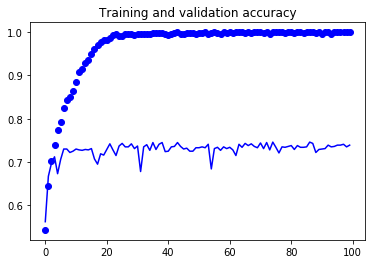

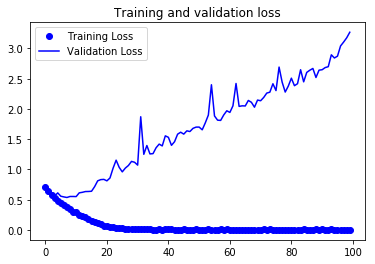

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### After Image Augmentation

In [13]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-07-18 02:30:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.16, 34.64.4.80, 34.64.4.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: `/tmp/horse-or-human.zip'

/tmp/horse-or-human 100%[===================>] 142.65M  32.0MB/s    in 4.7s    

2021-07-18 02:31:01 (30.5 MB/s) - `/tmp/horse-or-human.zip' saved [149574867/149574867]

--2021-07-18 02:31:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.16, 34.64.4.80, 34.64.4.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/100
8/8 [==============================] - 37s 5s/step - loss: 0.6904 - accuracy: 0.5751 - val_loss: 2.9059 - val_accuracy: 0.7461
Epoch 2/100
8/8 [==============================] - 35s 4s/step - loss: 0.6673 - accuracy: 0.6808 - val_loss: 8.2822 - val_accuracy: 0.7070
Epoch 3/100
8/8 [==============================] - 36s 5s/step - loss: 0.6398 - accuracy: 0.6796 - val_loss: 22.3589 - val_accuracy: 0.6484
Epoch 4/100
8/8 [==============================] - 36s 4s/step - loss: 0.6063 - accuracy: 0.6952 - val_loss: 63.5827 - val_accuracy: 0.5430
Epoch 5/100
8/8 [==============================] - 38s 5s/step - loss: 0.5785 - accuracy: 0.7188 - val_loss: 169.0581 - val_accuracy: 0.5000
Epoch 6/100
8/8 [==============================] - 35s 4s/step - loss: 0.5592 - accuracy: 0.7286 - val_loss: 117.7626 - val_accu

Epoch 57/100
8/8 [==============================] - 35s 4s/step - loss: 0.2359 - accuracy: 0.9077 - val_loss: 246.6958 - val_accuracy: 0.6250
Epoch 58/100
8/8 [==============================] - 35s 4s/step - loss: 0.1798 - accuracy: 0.9177 - val_loss: 646.3441 - val_accuracy: 0.5195
Epoch 59/100
8/8 [==============================] - 35s 4s/step - loss: 0.2869 - accuracy: 0.8932 - val_loss: 246.9764 - val_accuracy: 0.6328
Epoch 60/100
8/8 [==============================] - 35s 4s/step - loss: 0.1986 - accuracy: 0.9121 - val_loss: 442.9302 - val_accuracy: 0.5391
Epoch 61/100
8/8 [==============================] - 36s 4s/step - loss: 0.1755 - accuracy: 0.9355 - val_loss: 125.7352 - val_accuracy: 0.7539
Epoch 62/100
8/8 [==============================] - 34s 4s/step - loss: 0.2378 - accuracy: 0.8910 - val_loss: 137.2813 - val_accuracy: 0.7383
Epoch 63/100
8/8 [==============================] - 34s 4s/step - loss: 0.2132 - accuracy: 0.8943 - val_loss: 482.3046 - val_accuracy: 0.5312
Epoch 

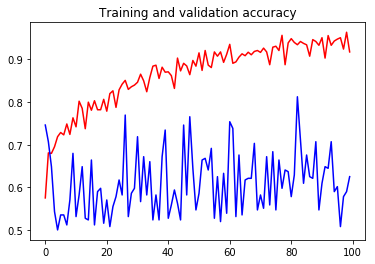

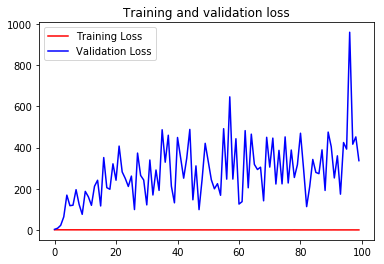

In [14]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')


local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()


# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
# this is the part where we do Image Augmentation (preprocessing`)
############################################################################################################
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
############################################################################################################
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# horse-human applying the image augmentation

validation accuracy seeems to go up in step but when the time passes, it fluctuate. 

what's happening here is that despite the image augmentation, the diversity of images is stilll to sparse and the validation set may also be poorly designed, namely that the type of image in it too close to the images in the training set. 

if you expect the data for yourself your'll see that's the case. 

for example, the humans are almost always standing up and in the center of the picture, in both the training and validation sets, so augmenting the image will change it to look like something that doesn't look like what's in the validation set. 

So, what we can learn from this is that the image augmentation introduces a random element to the training images but if the validation set doesn't have the same randomness, then its results can fluctuate like this. 

일단, validation_acc 값이 처음에는 잘 올라가는 것 같은데 나중되면 이상하게 값이 뒤죽박죽이다. 

이는 왜냐하면, augmentation 을 진행했음에도 불구하고 image 가 너무 다양한 이유와 다른 이유로는, validation set 이 너무 poorly design 되어있을 경우가 있는 것이다. 

예를 들자면, 사람이 한 가운데에 서있는 이미지가 training, validation set 에 동시에 많은 것이다. 그래서 augmentation 을 하면 오히려 이상한 방향으로 학습을 하게 만든다는 것이다 서 있는 이미지를 돌려 놔서 학습을 시켰는데, validation 에는 서있는 것으로 되어있으면 검증을 한다고 하더라도, 제대로 학습을 안 한 것으로 판단하게 됨을 의미하는 것이다. 

그래서 정리를 하자면, training_set 을 random 하게 augment 한다고 하더라도, validation 에도 그러한 randomness 가 없다고 하면, training_set 을 augment 해서 학습을 할지 언정, validation 에도 비슷한 이미지가 없으면 학습의 의미가 없는 것임을 알 수 있는 것이다. 

# QUIZ 정리 


3. When training with augmentation, you noticed that the training is a little slower. Why?
-> 나는 train 되어야 하는 data 가 많기 때문에 slow 하게 train 된다고 생각했었음. 
but, 
->  image processing 하는 것이 시간 걸리기 때문이라고 함. 

5. When using Image Augmentation with the ImageDataGenerator, what happens to your raw image data on-disk.
-> nothin, all augmentation is done in-memory. 
원래 있는 데이터가 어떻게 되는지 전혀 알지 못했었는데, augmentation 이 in-memory 에서 진행된다고 한다... 이게 무슨 말인지 정확하게 이해하지 못했다.. 